<a href="https://www.kaggle.com/code/collinslemeke/graduate-chance-of-admission?scriptVersionId=246706838" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

##  Predicting University Chance of Admit (COA)

The goal of this project is to develop a predictive model that estimates the likelihood of admission (chance of admit) for prospective students based on various features. The dataset provided contains several columns, each representing a different feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Data Collection and Exploration

In [2]:
student = pd.read_csv("/kaggle/input/chance-of-admission/adm_data.csv")
student.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,COA
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   COA                400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
student.shape

(400, 9)

In [5]:
student.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
COA                  float64
dtype: object

In [6]:
student.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,COA
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
a = student.isnull()
print(a)

student.isnull().sum()

     Serial No.  GRE Score  TOEFL Score  University Rating    SOP   LOR   \
0         False      False        False              False  False  False   
1         False      False        False              False  False  False   
2         False      False        False              False  False  False   
3         False      False        False              False  False  False   
4         False      False        False              False  False  False   
..          ...        ...          ...                ...    ...    ...   
395       False      False        False              False  False  False   
396       False      False        False              False  False  False   
397       False      False        False              False  False  False   
398       False      False        False              False  False  False   
399       False      False        False              False  False  False   

      CGPA  Research   COA   
0    False     False  False  
1    False     False  False

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
COA                  0
dtype: int64

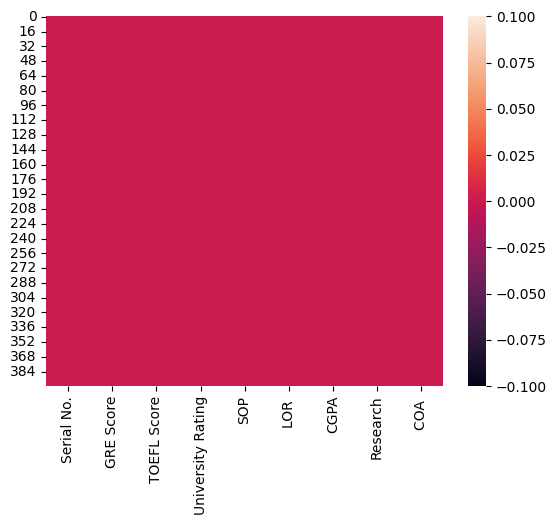

In [8]:
sns.heatmap(student.isnull(), cbar = 'False')
plt.show()

In [9]:
student.dropna()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,COA
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [10]:
student['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [11]:
#student['COA'].unique() # the reason why we got this error is a tricky one, we have to be extremely careful
                        # so i figured out that the column name 'COA' and 'LOR' both have spaces after it is spelt.
                        # to test this error look at the code below and notice the i will give.

In [12]:
student['COA '].unique() # as you can see the space after the COA before the ', now lets fix the column name.

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39])

### Note below;

The code below shows us how to fix the 'COA ' & 'LOR ' whitespaces in column name but  I noticed the white spaces keeps coming back and i think its due to some RegEx error, we will work with the whitespaces on the column and fix this later, after more research, I have hashtagged everycode below.

In [13]:
# Remove specific whitespace characters from column names
# student.columns = student.columns.str.replace('\s', '')

# Find unique values in 'COA' and 'LOR' columns
# COA_unique_values = student['COA'].unique()
# LOR_unique_values = student['LOR'].unique()

# print(COA_unique_values)
# print(LOR_unique_values)

# Assuming you have loaded the DataFrame as 'student'
# student.columns = student.columns.str.replace('\s', '', regex=False)

#### Note: The Above Code

In the code above, the replace() method is used with the regular expression \s, which represents any whitespace character. It replaces all whitespace characters with an empty string, effectively removing them from the column names.

In [14]:
student['COA '].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39])

In [15]:
student['CGPA'].value_counts()

CGPA
8.00    9
8.76    8
8.56    7
9.11    6
8.64    6
       ..
9.32    1
9.48    1
9.56    1
7.28    1
7.96    1
Name: count, Length: 168, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

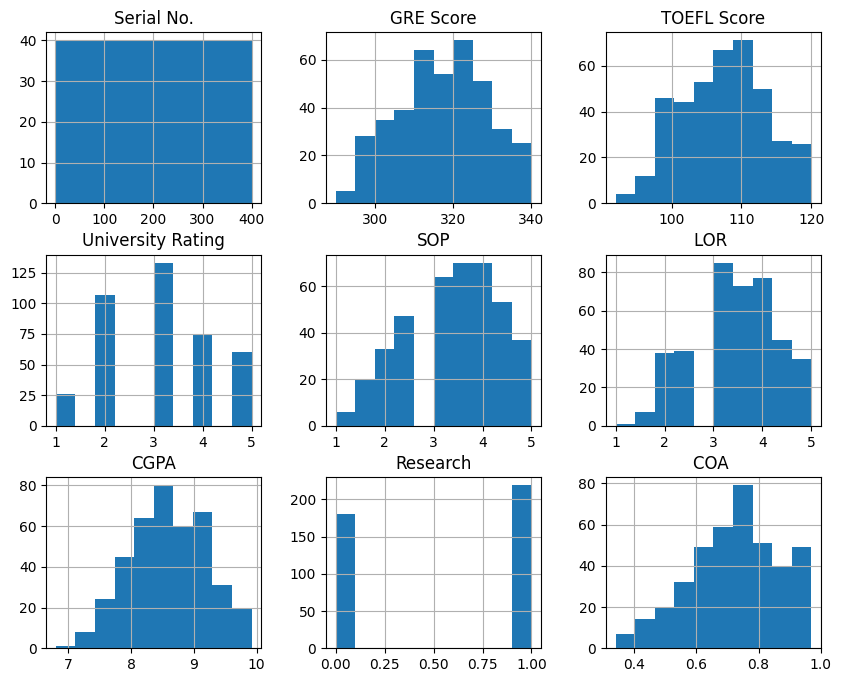

In [16]:
student.hist(figsize = (10, 8))
plt.show

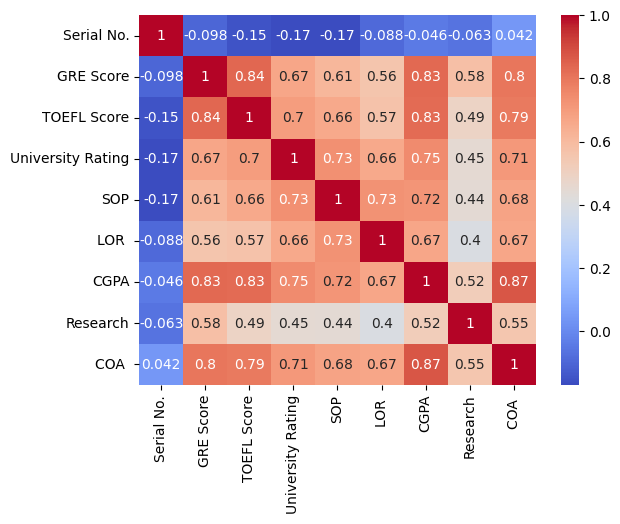

In [17]:
corr_matrix = student.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [18]:
student = student.drop_duplicates()

In [19]:
student.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
COA                  0
dtype: int64

In [20]:
student.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,COA
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:
print(student.columns)

scaler = MinMaxScaler()

columns_to_scale = ['GRE Score', 'TOEFL Score', 'CGPA']
student[columns_to_scale] = scaler.fit_transform(student[columns_to_scale])
print(student[columns_to_scale])

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'COA '],
      dtype='object')
     GRE Score  TOEFL Score      CGPA
0         0.94     0.928571  0.913462
1         0.68     0.535714  0.663462
2         0.52     0.428571  0.384615
3         0.64     0.642857  0.599359
4         0.48     0.392857  0.451923
..         ...          ...       ...
395       0.68     0.642857  0.717949
396       0.70     0.535714  0.740385
397       0.80     0.857143  0.849359
398       0.44     0.392857  0.634615
399       0.86     0.892857  0.916667

[400 rows x 3 columns]


### Split data (X) as feature variables and data (y) as target variable

In [22]:
print(student.columns)
print()

X = student.drop('COA ', axis = 1)
y = student['COA ']
print("=================BREAK=====================")
print()
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'COA '],
      dtype='object')

=================BREAK=====================

Shape of X:  (400, 8)
Shape of y:  (400,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

### Train the Linear Regression Model on the Training data

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)
y_pred

array([0.84450878, 0.54845417, 0.83673478, 0.74882812, 0.71843214,
       0.9638436 , 0.86648524, 0.92047317, 0.72311016, 0.69571172,
       0.92120209, 0.47817374, 0.8319751 , 0.88206992, 0.94150321,
       0.71022739, 0.70094757, 0.92250033, 0.67029139, 0.55091946,
       0.63342197, 0.67033478, 0.58190732, 0.52927221, 0.64416078,
       0.49045551, 0.76905158, 0.499334  , 0.83816486, 0.66695323,
       0.9550221 , 0.68180462, 0.60552949, 0.86489162, 0.83114177,
       0.6481375 , 0.657252  , 0.75562613, 0.94468142, 0.60845191,
       0.75274586, 0.89989076, 0.80185766, 0.58810062, 0.71320388,
       0.93123574, 0.71418484, 0.76010287, 0.80280172, 0.90636717,
       0.55487803, 0.71866052, 0.660896  , 0.75254397, 0.63541965,
       0.53189107, 0.70367893, 0.96021831, 0.82935446, 0.63051787,
       0.81140752, 0.62413014, 0.68945689, 0.8221825 , 0.767389  ,
       0.80695238, 0.75850514, 0.8488339 , 0.66532818, 0.78790474,
       0.81148881, 0.64166699, 0.57915559, 0.9264904 , 0.67749

### Evaluate the Model

In [26]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print()
print("THIS IS THE MODEL's PERFORMANCE")
print("===================================")
print()
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("R-Squared Error: ", r2)


THIS IS THE MODEL's PERFORMANCE

Mean Squared Error:  0.003122826644706968
Root Mean Squared Error:  0.055882256975778706
Mean Absolute Error:  0.039818230245838276
R-Squared Error:  0.855521262364243


1. Mean Squared Error (MSE): The average squared difference between the actual and predicted values is 0.0031. Lower values indicate more accurate predictions.

2. Root Mean Squared Error (RMSE): The square root of MSE is 0.0559, representing the average error in your predictions. Smaller RMSE indicates better model performance.

3. Mean Absolute Error (MAE): The average absolute difference between actual and predicted values is 0.0398. Lower MAE indicates better accuracy.

4. R-Squared (R2) Error: The R-squared value of 0.8555 shows that approximately 85.55% of the variance in the target variable is explained by your model. A higher R2 indicates a better fit to the data.

Overall, your linear regression model performs well, with accurate predictions and a strong fit to the data